### UCB fitting

In [1]:
import numpy as np
import pandas as pd
import mab_subjects
from banditpy.models import DecisionModel
from banditpy.models.policy import EmpiricalUCB, RLUCB, BayesianUCB

exps = mab_subjects.mostly_unstruc.allsess + mab_subjects.mostly_struc.allsess

ucb_df = []
for e, exp in enumerate(exps[6:7]):
    print(exp.sub_name)

    task = exp.b2a.filter_by_trials(100, 100)
    task.auto_block_window_ids()

    # mask_block1 = task.block_ids == 1
    # task_block1 = task._filtered(mask_block1)

    # mask_block2 = task.block_ids == 2
    # task_block2 = task._filtered(mask_block2)

    model = DecisionModel(task, policy=BayesianUCB())
    # model.fit(n_starts=30, progress=True, n_jobs=5)
    model.fit(
        method="de",
        de_popsize=20,
        de_maxiter=400,
        de_tol=1e-7,
        n_starts=2,
        progress=True,
        n_jobs=1,
        seed=None,
    )
    model.print_params()

    # model_block1 = DecisionModel(task_block1, policy=EmpiricalUCB())
    # model_block1.fit()

    # model_block2 = DecisionModel(task_block2, policy=EmpiricalUCB())
    # model_block2.fit()

    df = pd.DataFrame(
        {
            "name": exp.sub_name,
            "param_all": list(model.params.keys()),
            "param_values_all": list(model.params.values()),
            # "param_block1": list(model_block1.params.keys()),
            # "param_values_block1": list(model_block1.params.values()),
            # "param_block2": list(model_block2.params.keys()),
            # "param_values_block2": list(model_block2.params.values()),
            "grp": exp.group_tag,
            "dataset": exp.data_tag,
            "lesion": exp.lesion_tag,
            "mode": "classic",
        }
    )
    ucb_df.append(df)

ucb_df = pd.concat(ucb_df, ignore_index=True)

BGF0


Fitting DecisionModel:   0%|          | 0/2 [00:00<?, ?it/s]c:\Users\asheshlab\miniconda3\envs\data_analysis\Lib\site-packages\scipy\optimize\_differentialevolution.py:486: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,
Fitting DecisionModel: 100%|██████████| 2/2 [13:58<00:00, 419.47s/it]

Fitted parameters:
  explore: 0.0010
  tau: 0.6414
  q_init: 0.0000
  beta: 7.1134
NLL: 2576.99
BIC: 5189.04
Restart NLL mean±SD: 2576.994 ± 0.000


In [2]:
task2 = model.simulate_posterior_predictive()

In [ ]:
task2.to_df()

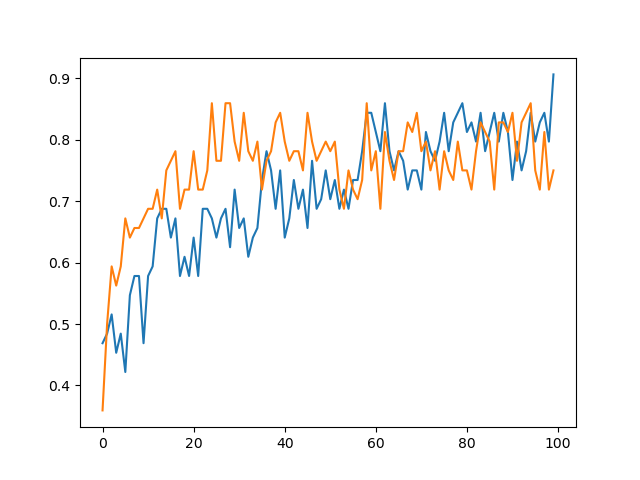

In [3]:
import matplotlib.pyplot as plt

plt.plot(task.get_optimal_choice_probability())
plt.plot(task2.get_optimal_choice_probability())
plt.show()

In [ ]:
model.print_params(), model_block1.print_params(), model_block2.print_params()

In [ ]:
model.simulate_posterior_predictive()

In [ ]:
from banditpy.models import DecisionModel
from banditpy.models.policy import EmpiricalUCB

In [ ]:
import seaborn as sns
from neuropy import plotting
from statplotannot.plots import xtick_format

fig = plotting.Fig(4, 2, fontsize=12)

ax = fig.subplot(fig.gs[0, 0])

sns.barplot(
    data=ucb_df,
    x="param_all",
    y="param_values_all",
    errorbar="se",
    hue="grp",
    ax=ax,
)
xtick_format(ax, rotation=45)

In [ ]:
mab_subjects.GroupData()